# import Libraries and Data

In [ ]:
# Table of contents
## Import Data
## Check Data consistency
## Create Histogram
## Create Line chart 1 and 2
## create scatter plot
## save charts visuals to file 
## Export notebook


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# allocate file path

path = r'C:\Users\admin\Desktop\10.2023 Instacart Basket Analysis'

path

'C:\\Users\\admin\\Desktop\\10.2023 Instacart Basket Analysis'

# using only 25percent of entire dataframe

because of persistent memory error issues, i chose to make a subset of my entire merged dataframe inoder to continue with my analysis

In [3]:
# read the pickle file and import it

ords_cus_merged =pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'subset_25percent.pkl'))

In [4]:
# check the output

ords_cus_merged.head()

,user_id,STATE,Age,number_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour,...,busiest day,busiest_day,busiest_slowest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag
3487529,3,Arizona,33,3,married,93240,-45,2,2,20,...,Regularly busy,Regularly busy,Regularly busy,Average orders,7,New customer,9.078125,Low spender,7.0,Frequent customer
1086135,59,Delaware,49,2,married,71218,78,16,1,15,...,Regularly busy,Regularly busy,Busiest days,Most orders,37,Regular customer,7.003906,Low spender,7.0,Frequent customer
6994335,27,New York,81,0,divorced/widowed,110170,66,10,1,14,...,Regularly busy,Regularly busy,Busiest days,Most orders,30,Regular customer,8.765625,Low spender,9.0,Frequent customer
12713972,26,New Mexico,59,2,married,49072,-26,27,6,11,...,Regularly busy,Regularly busy,Regularly busy,Most orders,50,Loyal customer,8.031250,Low spender,6.0,Frequent customer
5791778,52,Alabama,64,2,married,40974,-30,50,2,14,...,Regularly busy,Regularly busy,Regularly busy,Most orders,75,Loyal customer,8.117188,Low spender,5.0,Frequent customer


In [5]:
# check for shape of dataframe

ords_cus_merged.shape

(4034590, 30)

# Create histogram

Text(0, 0.5, 'Number of Orders')

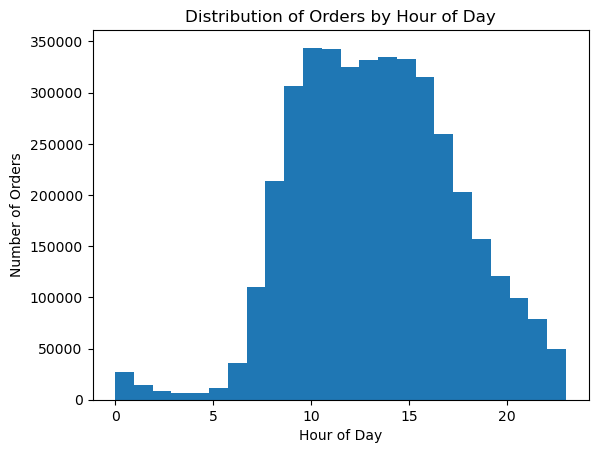

In [6]:
# need to provide the Instacart senior stakeholders with descriptive findings about sales. 
# Create a histogram of the “order_hour_of_day” column.

hist = ords_cus_merged['order_hour'].plot.hist(bins =24) #24 bins for each hour of the day

# Adding title and labels
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

As clearly illustrated from the chart, This is a distribution of orders by hour of day.
The y axis represent the number of orders
the x axis represent the order hour of day. (using 24 bins for each hour to represent 24hour) it is clearly evident
that most order volume are made durin during the day time 10am until 15pm have 
fewest orders are made during the hours of 0 until 5am


# Create Bar Chart

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0, 0.5, 'Number of Orders')

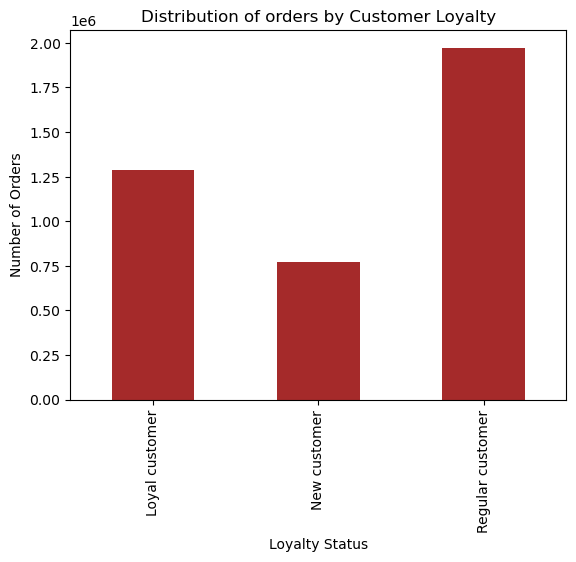

In [7]:

bar=ords_cus_merged['loyalty_flag'].value_counts().sort_index().plot.bar(color =['brown'])

plt.title('Distribution of orders by Customer Loyalty')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Orders')

We can see from the data 

# Create Line Chart 

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [8]:
# code for creating dataframe for only the columns necessary for the chart

df_2 = ords_cus_merged[['order_hour','prices']]

In [9]:
print(df_2)

          order_hour     prices
3487529           20  12.796875
1086135           15  13.000000
6994335           14  13.601562
12713972          11   3.099609
5791778           14   7.000000
...              ...        ...
4058328           10   6.398438
3675532           13  13.500000
4187608           15   1.799805
4975155           10   5.898438
10680134           8   7.699219

[4034590 rows x 2 columns]


([<matplotlib.axis.XTick at 0x1289a4eacd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

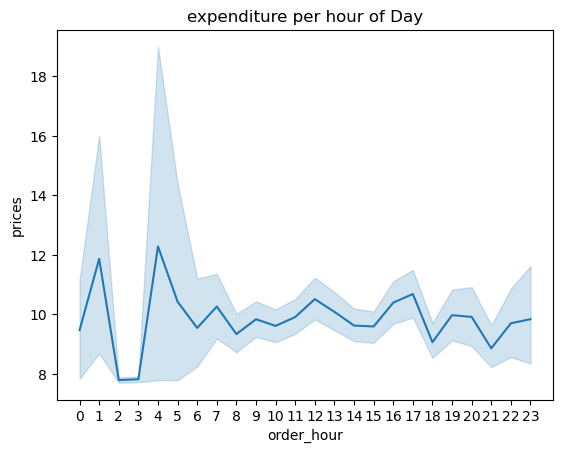

In [14]:
# Create a line plot chart. 

line = sns.lineplot(data = df_2, x = 'order_hour', y = 'prices')

plt.title('expenditure per hour of Day')
plt.xticks(range(0, 24)) # To show each hour on the x-axis

# second line chart
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [15]:
# code for creating dataframe for only the columns necessary for the chart

df_3 = ords_cus_merged[['Age','number_of_dependants']]

Text(0.5, 1.0, 'Average Number of Dependants by Age')

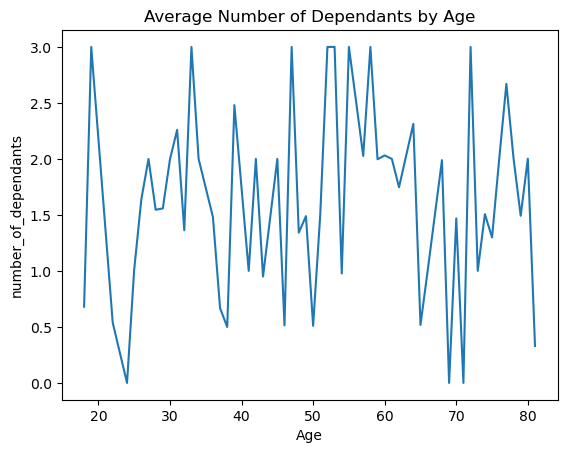

In [16]:
# df_3 is your DataFrame with 'age' and 'number_of_dependents' columns
# Group by 'age' and calculate the average number of dependents
df_3 = df_3.groupby('Age')['number_of_dependants'].mean().reset_index()

# Plotting
line_3 = sns.lineplot(data=df_3, x='Age', y='number_of_dependants')
plt.title('Average Number of Dependants by Age')

a line chart where the x-axis represents the age of the customers and the y-axis represents the average number of dependents. The chart shows interesting facts, for example age have higher number of dependants than their counterparts. In this sample data, the ages between 20,34,47,52,55,59 have a highest number of dependants. 

# Scatter Plot

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

Text(0.5, 1.0, 'spending power by Age')

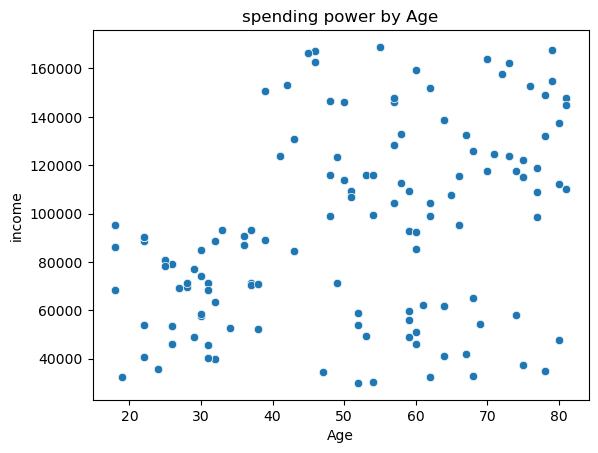

In [17]:
# code for scatter plot column 

scatter=sns.scatterplot(x = 'Age', y = 'income',data = ords_cus_merged)
plt.title('spending power by Age')


The scatterplot chart is to show whether theres a connection between the age and spending power. 
Looking at it from this perspective, one can clearly see the connections are sparsely discharged. 
It seems to move in a correlated design.there are no indication of an outlier because of its variety in proportion. 

# Export all visualization Charts

In [19]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour.png'))

In [20]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'))

In [21]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_spending.png'))

In [22]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents_age.png'))

In [23]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_age.png'))

In [24]:
# Export file to pickle (with consideration of size)
ords_cus_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_cus_merged_ready.pkl'))